In [ ]:
Bewin Felix R A
URK21CS1128

In [ ]:
AIM:
    To analyse the performance of Decision Tree Classification Technique.

In [ ]:
DESCRIPTION:
    Decision Tree is a Supervised learning technique that can be used for both 
classification and Regression problems, but mostly it is preferred for solving 
Classification problems. It is a tree-structured classifier, where internal 
nodes represent the features of a dataset, branches represent the decision 
rules and each leaf node␣represents the outcome.
In a Decision tree, there are two nodes, which are the Decision Node␣and Leaf
Node. Decision nodes are used to make any decision and have multiple branches,
whereas Leaf nodes are the output of those decisions and do not contain any
further branches.The decisions or the test are performed on the basis of 
features of the given dataset. It is a graphical representation for getting
all the possible solutions to a problem/decision based on given conditions.
It is called a decision tree because, similar to a tree, it starts with the
root node, which expands on further branches and constructs a tree-like 
structure. In order to build a tree, we use the CART algorithm, which stands 
for Classification and Regression Tree algorithm. A decision tree simply asks
a question, and based on the answer (Yes/No), it further split the tree into
subtrees.
Decision Tree Terminologies
Root Node: Root node is from where the decision tree starts. It represents the
entire dataset, which further gets divided into two or more homogeneous sets.
Leaf Node: Leaf nodes are the final output node, and the tree cannot be
segregated further after getting a leaf node.
Splitting: Splitting is the process of dividing the decision node/root nodE 
into sub-nodes according to the given conditions.
Branch/Sub Tree: A tree formed by splitting the tree.
Pruning: Pruning is the process of removing the unwanted branches from␣the tree.
Parent/Child node: The root node of the tree is called the parent node, and 
other nodes are called the child nodes.
Algorithm:
Step-1: Begin the tree with the root node, says S, which contains the␣complete
dataset.
Step-2: Find the best attribute in the dataset using Attribute Selection
Measure (ASM).
Step-3: Divide the S into subsets that contains possible values for the best
attributes.
Step-4: Generate the decision tree node, which contains the best attribute.
Step-5: Recursively make new decision trees using the subsets of the dataset
created in step3.
Continue this process until a stage is reached where you cannot further 
classify the nodes and called the final node as a leaf node.


In [ ]:
1. Develop a Decision Tree classification model for the Social_Network dataset using the
scikit-learn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,f1_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [4]:
print('1128')
df = pd.read_csv('Social_Network.csv')
df


1128


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15668575,0,26,43000,No
1,15603246,0,27,57000,No
2,15598044,0,27,84000,No
3,15727311,0,35,65000,No
4,15570769,0,26,80000,No
...,...,...,...,...,...
395,15672330,1,47,34000,Yes
396,15807837,1,48,33000,Yes
397,15592570,1,47,23000,Yes
398,15635893,1,60,42000,Yes


In [5]:
#a. Use the columns: 'Gender', 'Age', 'EstimatedSalary' as the independent variables
print(1128)
x=df[['Gender', 'Age', 'EstimatedSalary']]
x

1128


,Gender,Age,EstimatedSalary
0,0,26,43000
1,0,27,57000
2,0,27,84000
3,0,35,65000
4,0,26,80000
...,...,...,...
395,1,47,34000
396,1,48,33000
397,1,47,23000
398,1,60,42000


In [6]:
# b. Use the target variable as 'Purchased' (Yes-Y, No-N).
print(1128)
y = df['Purchased']
y

1128


0       No
1       No
2       No
3       No
4       No
      ... 
395    Yes
396    Yes
397    Yes
398    Yes
399    Yes
Name: Purchased, Length: 400, dtype: object

In [7]:
# c. Encode the categorical value of the target column to numerical value.
print(1128)
y.replace('Yes',1 ,inplace=True)
y.replace('No',0,inplace=True)
y

1128


0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Purchased, Length: 400, dtype: int64

In [8]:
#d. Divide the data into training (75%) and testing set (25%).
print(1128)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

1128


In [9]:
# e. Perform the classification with entropy and information gain as decision criteria in
#decision tree
print(1128)
tree_entropy = DecisionTreeClassifier(criterion='entropy')
tree_entropy.fit(x_train,y_train)
y_pred = tree_entropy.predict(x_test)
tree_ig = DecisionTreeClassifier(criterion='gini')
tree_ig.fit(x_train,y_train)
y_pred_ig = tree_ig.predict(x_test)


1128


1128
Accuracy using Entropy :  0.8
Accuracy using ig :  0.84
Recall using Entropy :  0.6744186046511628
Recall using ig :  0.7209302325581395
Precision using Entropy :  0.8285714285714286
Precision using ig :  0.8857142857142857
Specificity using Entropy :  0.8947368421052632
Specificity using ig :  0.9298245614035088
F1_score using Entropy :  0.7435897435897435
F1_score using ig :  0.7948717948717948
AUC score using Entropy :  0.7845777233782129
AUC score using ig :  0.8253773969808241


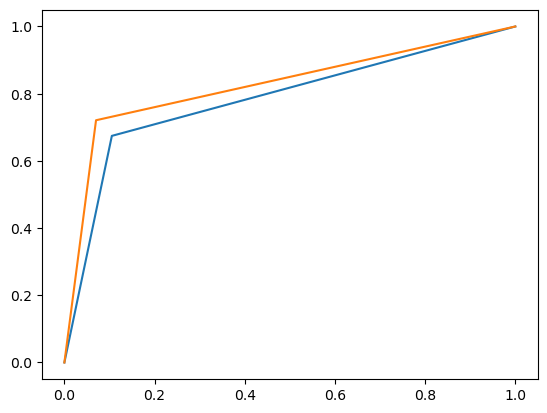

In [10]:
# f. Analyse the performance of the classifier with various performance measures such as
#confusion matrix, accuracy, recall, precision, specificity, f-score, Receiver operating
#characteristic (ROC) curve and Area Under Curve (AUC) score
print(1128)
print('Accuracy using Entropy : ',accuracy_score(y_test,y_pred))
print('Accuracy using ig : ',accuracy_score(y_test,y_pred_ig))

print('Recall using Entropy : ',recall_score(y_test,y_pred))
print('Recall using ig : ',recall_score(y_test,y_pred_ig))

print('Precision using Entropy : ',precision_score(y_test,y_pred))
print('Precision using ig : ',precision_score(y_test,y_pred_ig))

print('Specificity using Entropy : ',recall_score(y_test,y_pred,pos_label=0))
print('Specificity using ig : ',recall_score(y_test,y_pred_ig,pos_label=0))

print('F1_score using Entropy : ',f1_score(y_test,y_pred))
print('F1_score using ig : ',f1_score(y_test,y_pred_ig))

print('AUC score using Entropy : ',roc_auc_score(y_test,y_pred))
print('AUC score using ig : ',roc_auc_score(y_test,y_pred_ig))

# ROC curve entropy
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)

#ROC curve ig
fpr, tpr, _ = roc_curve(y_test, y_pred_ig)
plt.plot(fpr,tpr)


1128


[Text(0.41785714285714287, 0.9545454545454546, 'x[1] <= 42.5\nentropy = 0.918\nsamples = 300\nvalue = [200, 100]'),
 Text(0.21428571428571427, 0.8636363636363636, 'x[2] <= 89500.0\nentropy = 0.603\nsamples = 217\nvalue = [185, 32]'),
 Text(0.05714285714285714, 0.7727272727272727, 'x[1] <= 36.5\nentropy = 0.121\nsamples = 182\nvalue = [179, 3]'),
 Text(0.02857142857142857, 0.6818181818181818, 'entropy = 0.0\nsamples = 129\nvalue = [129, 0]'),
 Text(0.08571428571428572, 0.6818181818181818, 'x[2] <= 67500.0\nentropy = 0.314\nsamples = 53\nvalue = [50, 3]'),
 Text(0.05714285714285714, 0.5909090909090909, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(0.11428571428571428, 0.5909090909090909, 'x[2] <= 70500.0\nentropy = 0.491\nsamples = 28\nvalue = [25, 3]'),
 Text(0.05714285714285714, 0.5, 'x[0] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.02857142857142857, 0.4090909090909091, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.08571428571428572, 0.4090909090909

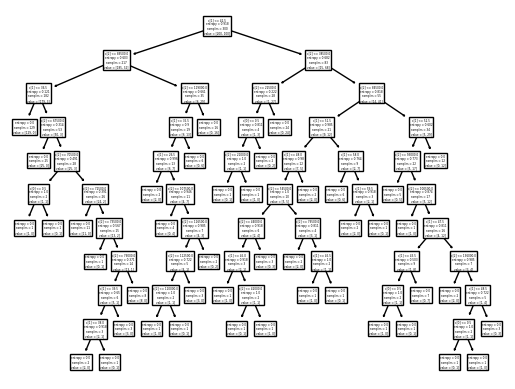

In [11]:
 # g. Display the constructed decision tree sklearn.tree.plot_tree method.
print(1128)
plot_tree(tree_entropy)

1128


[Text(0.3704268292682927, 0.9583333333333334, 'x[1] <= 42.5\ngini = 0.444\nsamples = 300\nvalue = [200, 100]'),
 Text(0.18902439024390244, 0.875, 'x[2] <= 89500.0\ngini = 0.251\nsamples = 217\nvalue = [185, 32]'),
 Text(0.06097560975609756, 0.7916666666666666, 'x[1] <= 36.5\ngini = 0.032\nsamples = 182\nvalue = [179, 3]'),
 Text(0.036585365853658534, 0.7083333333333334, 'gini = 0.0\nsamples = 129\nvalue = [129, 0]'),
 Text(0.08536585365853659, 0.7083333333333334, 'x[2] <= 67500.0\ngini = 0.107\nsamples = 53\nvalue = [50, 3]'),
 Text(0.06097560975609756, 0.625, 'gini = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(0.10975609756097561, 0.625, 'x[2] <= 70500.0\ngini = 0.191\nsamples = 28\nvalue = [25, 3]'),
 Text(0.04878048780487805, 0.5416666666666666, 'x[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.024390243902439025, 0.4583333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07317073170731707, 0.4583333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 

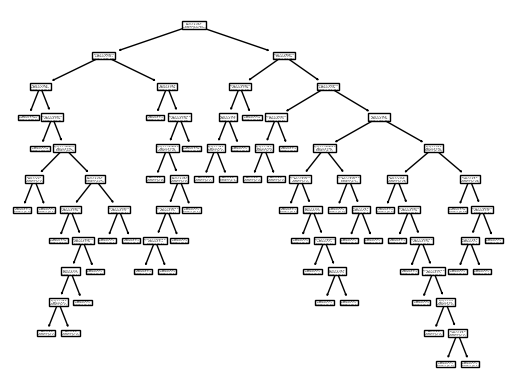

In [12]:
print(1128)
plot_tree(tree_ig)


In [13]:
#h. Prune the tree with maximum depth as 3,5,7 and tabulate the various TP, TN, accuracy,
#f-score and AUC score obtained.
print(1128)

for i in [3,5,7]:
    tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    tree_entropy.fit(x_train,y_train)
    y_pred = tree_entropy.predict(x_test)
    tree_ig = DecisionTreeClassifier(criterion='gini',max_depth=i)
    tree_ig.fit(x_train,y_train)
    y_pred_ig = tree_ig.predict(x_test)
    #Accuracy
    print('Accuracy using Entropy : ',accuracy_score(y_test,y_pred))
    print('Accuracy using ig : ',accuracy_score(y_test,y_pred_ig))
    #f1_score
    print('F1_score using Entropy : ',f1_score(y_test,y_pred))
    print('F1_score using ig : ',f1_score(y_test,y_pred_ig))
	#AUC score
    print('AUC score using Entropy : ',roc_auc_score(y_test,y_pred))
    print('AUC score using ig : ',roc_auc_score(y_test,y_pred_ig))
    conf_matrix=confusion_matrix(y_test,y_pred)
    conf_matrix1=confusion_matrix(y_test,y_pred_ig)
	#tp
    print('TP for entropy : ',conf_matrix[1][1])
    print('TP for ig : ',conf_matrix1[1][1])
	#tn
    print('TN for entropy : ',conf_matrix[0][0])
    print('TN for ig : ',conf_matrix1[0][0])



1128
Accuracy using Entropy :  0.89
Accuracy using ig :  0.85
F1_score using Entropy :  0.8735632183908046
F1_score using ig :  0.8192771084337349
AUC score using Entropy :  0.8892288861689106
AUC score using ig :  0.8427172582619339
TP for entropy :  38
TP for ig :  34
TN for entropy :  51
TN for ig :  51
Accuracy using Entropy :  0.83
Accuracy using ig :  0.88
F1_score using Entropy :  0.7733333333333334
F1_score using ig :  0.8536585365853658
AUC score using Entropy :  0.8108935128518971
AUC score using ig :  0.871889024887801
TP for entropy :  29
TP for ig :  35
TN for entropy :  54
TN for ig :  53
Accuracy using Entropy :  0.84
Accuracy using ig :  0.84
F1_score using Entropy :  0.8048780487804877
F1_score using ig :  0.8
AUC score using Entropy :  0.8310893512851898
AUC score using ig :  0.8282333741330069
TP for entropy :  33
TP for ig :  32
TN for entropy :  51
TN for ig :  52


In [ ]:
RESULT:
    Thus the performance analysis for decision tree classification technique is done successfully.